In [ ]:
import cv2
import numpy as np
import random

def generate_star_layer(image_shape, num_stars=200, max_radius=2):
    """Generate a grayscale star layer matching the input image shape."""
    height, width = image_shape
    stars_layer = np.zeros((height, width), dtype=np.uint8)

    for _ in range(num_stars):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        radius = random.randint(1, max_radius)
        brightness = int(min(255, 100 + radius * 50))  # Adjust brightness based on radius
        # brightness = random.randint(140, 255)  # star brightness

        cv2.circle(stars_layer, (x, y), radius, brightness, -1, lineType=cv2.LINE_AA)
        if radius > 4:
            # Add a halo effect for larger stars
            halo_radius = radius + random.randint(1, 3)
            halo_brightness = max(0, brightness - random.randint(50, 100))
            cv2.circle(stars_layer, (x, y), halo_radius, halo_brightness, -1, lineType=cv2.LINE_AA)

    return stars_layer


def generate_star_layer_with_gaussian_distribution(image_shape, num_stars=200, max_radius=8, sigma=2.0):
    """Generate a star layer with a Gaussian distribution."""
    height, width = image_shape
    stars_layer = np.zeros((height, width), dtype=np.uint8)

    # Loop to place each star
    for _ in range(num_stars):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        I0 = random.random() * 6 + 0.1

        # Gaussian function to create a star with Gaussian distribution
        for i in range(-max_radius, max_radius + 1):
            for j in range(-max_radius, max_radius + 1):
                # Calculate the distance from the center (x, y)
                r = np.sqrt(i**2 + j**2)
                
                if r <= max_radius:
                    # Gaussian formula to calculate the intensity
                    intensity = I0 * np.exp(-(r**2) / (2 * sigma**2)) * 255
                    # Ensure that the pixel is within bounds
                    nx, ny = x + i, y + j
                    if 0 <= nx < width and 0 <= ny < height:
                        stars_layer[ny, nx] = min(255, stars_layer[ny, nx] + intensity)

    return stars_layer



def add_stars_to_image(input_path, output_path, num_stars=200):
    """Add fake stars to a grayscale image and save the result."""
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    # Rescale the image to reduce brightness
    image = cv2.convertScaleAbs(image, alpha=0.4, beta=0)
    if image is None:
        raise FileNotFoundError(f"Could not load image from path: {input_path}")

    stars = generate_star_layer_with_gaussian_distribution(image.shape, num_stars=num_stars, max_radius = 8)

    result = cv2.add(image, stars)

    cv2.imwrite(output_path, result)
    return result




In [39]:

# === USAGE ===
# Replace with your actual image path:
input_path = "backgrounds/IMG_2816.jpg"
output_path = "generated/i1.png"
result = add_stars_to_image(input_path, output_path, num_stars=600)

stretch??

In [44]:
import matplotlib.pyplot as plt

In [40]:
from auto_stretch import apply_stretch

stretched_img = apply_stretch(result)

In [69]:
from skimage import exposure
from skimage.exposure import match_histograms

def match_histograms_f(image_path, reference_path):
    reference = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    matched = match_histograms(image, reference, channel_axis=None)

    fig, (ax1, ax2, ax3) = plt.subplots(
        nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
    )
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(image)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))


    img_hist, bins = exposure.histogram(image, source_range='dtype')
    axes[0].plot(bins, img_hist / img_hist.max())
    img_cdf, bins = exposure.cumulative_distribution(image)
    axes[0].plot(bins, img_cdf)

    img_hist, bins = exposure.histogram(reference, source_range='dtype')
    axes[1].plot(bins, img_hist / img_hist.max())
    img_cdf, bins = exposure.cumulative_distribution(reference)
    axes[1].plot(bins, img_cdf)

    img_hist, bins = exposure.histogram(matched, source_range='dtype')
    axes[2].plot(bins, img_hist / img_hist.max())
    img_cdf, bins = exposure.cumulative_distribution(matched)
    axes[2].plot(bins, img_cdf)

    axes[0].set_title('Source')
    axes[1].set_title('Reference')
    axes[2].set_title('Matched')

    plt.tight_layout()
    plt.show()
    return matched

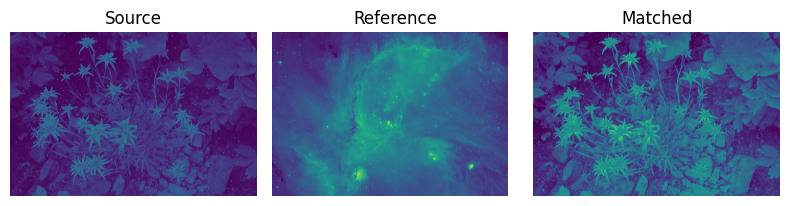

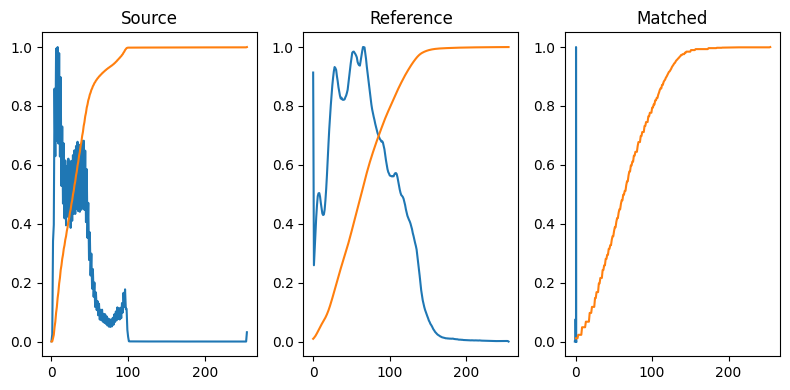

In [70]:
matched = match_histograms_f("generated/i1.png", "../output_images/original_image.png")

In [71]:
cv2.imwrite("generated/matched.png", matched)

True